In [923]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score, mean_absolute_error, precision_score, recall_score, f1_score
import math
import statsmodels.api as sm

import heapq
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.tree import export_graphviz
import graphviz
from collections import Counter

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler_min_max = MinMaxScaler(feature_range=(0, 1))

import statsmodels.tsa.stattools as smt
from statsmodels.tsa.stattools import grangercausalitytests

from IPython.display import Image
from scipy.stats import norm
from scipy.signal import argrelextrema

pd.set_option('display.max_columns', None)

In [924]:
prices = pd.read_csv("useful_data/round_2_day_1_joined_table.csv")
prices.rename(columns={prices.columns[0]: 'timestamp'}, inplace=True)
prices

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,total_ask_vol,total_bid_vol,ask_vwap,bid_vwap,spread
0,0,1094.0,10.0,1093.0,3.0,1086.0,41.0,1102.0,10.0,1104.0,3.0,1111.0,41.0,1098.0,0.000000,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1,54.0,54.0,1108.944444,1087.870370,8.0
1,100,1094.0,6.0,1093.0,2.0,1087.0,51.0,1102.0,6.0,1103.0,2.0,1110.0,51.0,1098.0,0.000000,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1,59.0,59.0,1108.949153,1087.915254,8.0
2,200,1093.0,6.0,1092.0,3.0,1085.0,49.0,1101.0,6.0,1102.0,3.0,1108.0,49.0,1097.0,109600.000000,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1,58.0,58.0,1106.965517,1086.189655,8.0
3,300,1093.0,10.0,1092.0,4.0,1085.0,52.0,1101.0,10.0,1102.0,4.0,1109.0,52.0,1097.0,109600.000000,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1,66.0,66.0,1107.363636,1086.636364,8.0
4,400,1093.0,10.0,1092.0,3.0,1086.0,51.0,1101.0,10.0,1102.0,3.0,1109.0,51.0,1097.0,109600.000000,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1,64.0,64.0,1107.421875,1087.375000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99500,1067.0,5.0,1066.0,4.0,1060.0,43.0,1074.0,5.0,1075.0,4.0,1082.0,43.0,1070.5,111088.679688,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1,52.0,52.0,1080.692308,1061.134615,7.0
996,99600,1068.0,7.0,1067.0,2.0,1061.0,46.0,1075.0,7.0,1076.0,2.0,1083.0,46.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1,55.0,55.0,1081.727273,1062.109091,7.0
997,99700,1068.0,5.0,1067.0,3.0,1061.0,48.0,1076.0,5.0,1077.0,3.0,1083.0,48.0,1072.0,111088.679688,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1,56.0,56.0,1082.053571,1061.946429,8.0
998,99800,1068.0,8.0,1067.0,3.0,1061.0,49.0,1075.0,8.0,1076.0,3.0,1083.0,49.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1,60.0,60.0,1081.583333,1062.233333,7.0


In [925]:
r2_data = pd.read_csv("../../manual/cleaned_r2.csv")
r2_data.rename(columns={r2_data.columns[0]: 'timestamp'}, inplace=True)
r2_data['day'] = 2
r2_data['ORCHIDS'] = (r2_data['bidPrice'] + r2_data['askPrice']) / 2
r2_data['timestamp'] *= 100
r2_data

,timestamp,bidPrice,askPrice,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,day,ORCHIDS
0,0,1055.0,1057.0,1.0,8.0,-2.0,1100.0000,75.000000,2,1056.00
1,100,1054.0,1055.5,1.0,8.0,-2.0,1100.8351,75.024070,2,1054.75
2,200,1054.0,1055.5,1.0,8.0,-2.0,1101.6697,75.048004,2,1054.75
3,300,1054.5,1056.0,1.0,8.0,-2.0,1102.5039,75.071810,2,1055.25
4,400,1055.5,1057.0,1.0,8.0,-2.0,1103.3376,75.095474,2,1056.25
...,...,...,...,...,...,...,...,...,...,...
9995,999500,1051.0,1053.0,0.8,8.0,-4.0,2597.2483,69.917725,2,1052.00
9996,999600,1050.5,1051.5,0.8,8.0,-4.0,2597.7950,69.934050,2,1051.00
9997,999700,1051.0,1052.5,0.8,8.0,-4.0,2598.3435,69.950450,2,1051.75
9998,999800,1052.0,1053.0,0.8,8.0,-4.0,2598.8938,69.966900,2,1052.50


In [926]:
prices_neg1 = pd.read_csv("../../data2024/island-data-bottle-round-2/prices_round_2_day_-1.csv", sep=";")

day = prices_neg1.columns[-1]
new_order = [day] + [col for col in prices_neg1.columns if col != day] 
prices_neg1 = prices_neg1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_neg1[col] = pd.to_numeric(prices_neg1[col], errors='coerce')
    
prices_0 = pd.read_csv("../../data2024/island-data-bottle-round-2/prices_round_2_day_0.csv", sep=";")

day = prices_0.columns[-1]
new_order = [day] + [col for col in prices_0.columns if col != day] 
prices_0 = prices_0[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_0[col] = pd.to_numeric(prices_0[col], errors='coerce')

prices_pos1 = pd.read_csv("../../data2024/island-data-bottle-round-2/prices_round_2_day_1.csv", sep=";")

day = prices_pos1.columns[-1]
new_order = [day] + [col for col in prices_pos1.columns if col != day] 
prices_pos1 = prices_pos1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_pos1[col] = pd.to_numeric(prices_pos1[col], errors='coerce')

orchids = pd.concat([prices_neg1, prices_0, prices_pos1, r2_data], ignore_index=True)
orchids = orchids.drop(columns=['bidPrice', 'askPrice'])
orchids['new_timestamp'] = orchids['timestamp']
orchids.loc[10001:, 'new_timestamp'] += 1000100
orchids.loc[20002:, 'new_timestamp'] += 1000100
orchids.loc[30003:, 'new_timestamp'] += 1000100
orchids.iloc[0:30005]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400
...,...,...,...,...,...,...,...,...,...
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100
30002,1,1000000,1035.25,0.9,9.5,-5.0,2300.0000,70.00000,3000200
30003,2,0,1056.00,1.0,8.0,-2.0,1100.0000,75.00000,3000300


In [927]:
def weighted_moving_average(series, window):
    """
    Calculate the Weighted Moving Average (WMA) for a given series with a specified window size.
    """
    # Weights increase linearly from 1 to 'window' and then normalize them
    weights = np.arange(1, window + 1) / window
    return series.rolling(window=window, min_periods=1).apply(lambda x: np.dot(x, weights[-len(x):]) / np.sum(weights[-len(x):]), raw=True)

def hull_moving_average(series, window):
    """
    Calculate the Hull Moving Average (HMA) using Weighted Moving Average (WMA).
    """
    # Calculate the WMA for half the window length and double it
    half_window_wma = weighted_moving_average(series, window // 2) * 2

    # Calculate the WMA for the full window length
    full_window_wma = weighted_moving_average(series, window)

    # Calculate the difference between the two WMA series
    diff_wma = half_window_wma - full_window_wma

    # Calculate the square root of the window length
    sqrt_window = int(np.sqrt(window))

    # Calculate the WMA of the difference with a period of the square root of the window length
    hma = weighted_moving_average(diff_wma, sqrt_window)

    return hma

def exp_hull_moving_average(series, window):
    """
    Calculate the Hull Moving Average (HMA) using the Exponential Moving Average (EMA),
    ensuring calculations start from the first available data point.
    
    Parameters:
    series (pandas.Series): The time series data.
    window (int): The window size for the HMA calculation.
    
    Returns:
    pandas.Series: The HMA values as a new time series.
    """
    # Calculate the EMA for half the window length, starting calculations from the first data point
    half_length_ema = series.ewm(span=window // 2, adjust=False, min_periods=1).mean()

    # Calculate the EMA for the full window length, also starting from the first data point
    full_length_ema = series.ewm(span=window, adjust=False, min_periods=1).mean()

    # Calculate the difference between the two EMA series (2*half_length EMA - full_length EMA)
    diff_ema = 2 * half_length_ema - full_length_ema

    # Calculate the square root of the window length
    sqrt_window = int(np.sqrt(window))

    # Calculate the EMA of the difference with a period of the square root of the window length, starting from the first data point
    hma = diff_ema.ewm(span=sqrt_window, adjust=False, min_periods=1).mean()

    return hma

In [928]:
roll = 400
lag = 14

# Potential Sunlight Indicators

orchids['alt_sun'] = np.where(orchids['SUNLIGHT'] >= 2500, orchids['SUNLIGHT'], 0) / 100 # overpowers SUNLIGHT sometimes
orchids['alt_sun_low'] = np.where(orchids['SUNLIGHT'] < 2500, orchids['SUNLIGHT'], 0) / 100 

orchids['alt_cum_sun'] = orchids.groupby('day')['alt_sun'].cumsum() / 10000 # no
orchids['alt_remain_sun'] = (25*7/12 - np.minimum(orchids['alt_cum_sun'], 25*7/12)) * 12 / 7 # yes
orchids['alter_cum_sun'] = 25 - orchids['alt_remain_sun']
# orchids['alt_remain_sun_exp'] = np.exp(orchids['alt_remain_sun']) / 100
# orchids['sun_roll'] = orchids['SUNLIGHT'].rolling(window=round(10000*7/12), min_periods = 1).mean()

# to add: sun diff over 2500 or max(sun - 2500, 0), try pct change instead of diff
# orchids['sun_change'] = orchids.groupby('day')['SUNLIGHT'].pct_change() * 10000 # yes
orchids['sun_diff'] = orchids.groupby('day')['SUNLIGHT'].diff() # yes
orchids['alt_sun_diff'] = np.where(orchids['SUNLIGHT'] >= 2500, orchids['sun_diff'], 0)
orchids['alt_sun_diff_low'] = np.where(orchids['SUNLIGHT'] < 2500, orchids['sun_diff'], 0)
orchids['alter_sun'] = np.maximum(orchids['SUNLIGHT'] - 2500, 0)
orchids['alter_sun_low'] = np.maximum(2500 - orchids['SUNLIGHT'], 0)



# Potential Humidity Indicators
orchids['hum_dist'] = orchids['HUMIDITY'] - 70
orchids['abs_hum_dist'] = orchids['hum_dist'].abs() # keep
orchids['alt_hum_dist'] = np.maximum(orchids['abs_hum_dist'] - 10, 0) # not as good
orchids['alter_hum_dist'] = np.maximum(10 - orchids['abs_hum_dist'], 0)

orchids['alt_hum_h'] = np.where(orchids['HUMIDITY'] > 80, orchids['HUMIDITY'], 0)
orchids['alt_hum_m'] = np.where(orchids['HUMIDITY'] <= 80, orchids['HUMIDITY'], 0)
# orchids['hum_exp'] = np.exp(orchids['abs_hum_dist'])
# orchids['alt_hum_exp'] = np.exp(orchids['alt_hum_dist'])
                                     
orchids['high_low_humidity'] = ((orchids['HUMIDITY'] < 60) | (orchids['HUMIDITY'] > 80)).astype(int) # indicator
orchids['mid_humidity'] = ((orchids['HUMIDITY'] >= 60) | (orchids['HUMIDITY'] <= 80)).astype(int) # indicator

orchids['hum_diff'] = orchids['HUMIDITY'].diff() # yes
orchids['abs_hum_dist_diff'] = orchids['abs_hum_dist'].diff() # really think this should work
orchids['abs_hum_dist_diff_hl'] = np.where(orchids['alt_hum_dist'] > 10, orchids['abs_hum_dist_diff'], 0)
orchids['abs_hum_dist_diff_mid'] = np.where(orchids['alt_hum_dist'] <= 10, orchids['abs_hum_dist_diff'], 0)

orchids['hl_hum_ind'] = ((orchids['abs_hum_dist_diff'] < 0)).astype(int) * orchids['high_low_humidity']
orchids['hl_hum_ind_v2'] = np.sign(orchids['abs_hum_dist_diff']) * orchids['high_low_humidity']

orchids['hum_avg'] = orchids.groupby('day')['HUMIDITY'].expanding().mean().reset_index(level=0, drop=True)
orchids['hum_avg_dist'] = orchids['hum_avg'] - 70
orchids['abs_hum_avg_dist'] = orchids['hum_avg_dist'].abs() 

orchids['roll_hum_avg'] = orchids.groupby('day')['HUMIDITY'].transform(lambda x: x.rolling(window=70, min_periods=1).mean())
# orchids['roll_hum_avg_dist'] = orchids['roll_hum_avg'] - 70
# orchids['abs_roll_hum_avg_dist'] = orchids['roll_hum_avg_dist'].abs()

# TTE

orchids['tte'] = (10000000 - orchids['timestamp']) / 100000


# Interactions

orchids['sun_hum'] = orchids['hum_dist'] * orchids['SUNLIGHT'] / 100
orchids['abs_sun_hum'] = orchids['abs_hum_dist'] * orchids['SUNLIGHT'] / 100
orchids['alt_sun_hum'] = orchids['alt_hum_dist'] * orchids['SUNLIGHT'] / 100

# Orchid Transformations

orchids['orchid_shift'] = orchids.groupby('day')['ORCHIDS'].shift(-lag)
orchids['orchid_return'] = orchids['orchid_shift'] - orchids['ORCHIDS']

orchids['orchid_roll'] = orchids.groupby('day')['ORCHIDS'].transform(lambda x: x.ewm(span=roll, adjust=False, min_periods=1).mean())
orchids['orchid_hull'] = orchids.groupby('day')['ORCHIDS'].transform(lambda x: hull_moving_average(x, roll))
orchids['orchid_hull_ewm'] = orchids.groupby('day')['ORCHIDS'].transform(lambda x: exp_hull_moving_average(x, roll))

orchids['orchid_roll_shift'] = orchids.groupby('day')['orchid_roll'].shift(-lag)
orchids['orchid_roll_return'] = orchids['orchid_roll_shift'] - orchids['orchid_roll']

orchids['orchid_roll_rel'] = orchids.groupby('day')['orchid_roll'].transform(lambda x: x - x.iloc[0])
orchids['orchid_roll_rel_shift'] = orchids.groupby('day')['orchid_roll_rel'].shift(-lag) + 1000

def f(x):
    if x > .3:
        return 1
    elif x < -0.3:
        return -1
    else:
        return 0

orchids['orchid_return_shift'] = orchids.groupby('day')['orchid_return'].shift(-lag)
orchids['orchid_up_down'] = orchids.groupby('day')['orchid_return'].transform(lambda x: x.apply(f).shift(-lag))

orchids['orchid_roll_return_shift'] = orchids.groupby('day')['orchid_roll_return'].shift(-lag)
orchids['orchid_roll_up_down'] = orchids.groupby('day')['orchid_roll_return'].transform(lambda x: x.apply(f).shift(-lag))

# orchids['orchid_sun'] = orchids['orchid_diff'] / orchids['SUNLIGHT'].diff()
# orchids['orchid_hum'] = orchids['orchid_diff'] / orchids['HUMIDITY'].diff()

# Make sure to use the below features when actually trading

orchids['transport_roll'] = orchids.groupby('day')['TRANSPORT_FEES'].transform(lambda x: x.ewm(span=roll, adjust=False, min_periods=1).mean())
orchids['export_roll'] = orchids.groupby('day')['EXPORT_TARIFF'].transform(lambda x: x.ewm(span=roll, adjust=False, min_periods=1).mean())
orchids['import_roll'] = orchids.groupby('day')['IMPORT_TARIFF'].transform(lambda x: x.ewm(span=roll, adjust=False, min_periods=1).mean())

orchids['transport_diff'] = orchids.groupby('day')['transport_roll'].diff()
orchids['export_diff'] = orchids.groupby('day')['export_roll'].diff()
orchids['import_diff'] = orchids.groupby('day')['import_roll'].diff()

# try out fees, separate out rf from linear

# features = ['TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'tte']
features_lin = ['alter_sun', 'alter_sun_low', 'alt_sun_diff', 'transport_diff', 'export_diff', 'import_diff', 'alt_hum_m', 'alt_hum_h',# 'alt_sun_diff', # 
                        'abs_hum_dist_diff_hl', 'abs_hum_dist_diff_mid', 'alt_sun_diff_low', 'alt_hum_dist', 'alter_hum_dist',
               'alt_sun', 'alt_sun_low']#, 
                       #'SUNLIGHT'] # ,'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'HUMIDITY']
features_rf = ['alter_sun', 'alter_sun_low', 'alt_sun_diff', 'alt_hum_h', 'alt_hum_m', 'alt_sun', 'alt_sun_low', # 'alt_sun_diff', # 
                        'abs_hum_dist_diff_hl', 'abs_hum_dist_diff_mid', 'alt_sun_diff_low', 'alt_hum_dist', 'alter_hum_dist'] # 'transport_diff', 'export_diff', 'import_diff',
                       # 'alter_cum_sun', 'alt_sun_diff', 'transport_roll', 'export_roll', 'import_roll',
                       #'SUNLIGHT'] # ,'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'HUMIDITY']

orchids.iloc[30000:30010]#[orchids['hl_hum_ind_v2']==0]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_sun_low,alt_cum_sun,alt_remain_sun,alter_cum_sun,sun_diff,alt_sun_diff,alt_sun_diff_low,alter_sun,alter_sun_low,hum_dist,abs_hum_dist,alt_hum_dist,alter_hum_dist,alt_hum_h,alt_hum_m,high_low_humidity,mid_humidity,hum_diff,abs_hum_dist_diff,abs_hum_dist_diff_hl,abs_hum_dist_diff_mid,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_shift,orchid_return,orchid_roll,orchid_hull,orchid_hull_ewm,orchid_roll_shift,orchid_roll_return,orchid_roll_rel,orchid_roll_rel_shift,orchid_return_shift,orchid_up_down,orchid_roll_return_shift,orchid_roll_up_down,transport_roll,export_roll,import_roll,transport_diff,export_diff,import_diff
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620,3000000,0.0,22.999690,9.325774,9.012959,15.987041,0.0134,0.0,0.0134,0.0,200.0310,-0.032380,0.032380,0.0,9.967620,0.0,69.967620,0,1,0.016090,-0.016090,0.0,-0.016090,0,-0.0,77.564270,7.564270,7.564270,69.459244,90.002,-0.744730,0.744730,0.0,NaN,NaN,1060.305553,1051.731535,1051.675868,NaN,NaN,-37.944447,NaN,NaN,NaN,NaN,NaN,0.903895,9.364270,-5.013183,-0.000020,0.000680,0.000066
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780,3000100,0.0,22.999840,9.325774,9.012959,15.987041,0.0150,0.0,0.0150,0.0,200.0160,-0.016220,0.016220,0.0,9.983780,0.0,69.983780,0,1,0.016160,-0.016160,0.0,-0.016160,0,-0.0,77.563511,7.563511,7.563511,69.473344,90.001,-0.373057,0.373057,0.0,NaN,NaN,1060.175601,1051.550888,1051.489235,NaN,NaN,-38.074399,NaN,NaN,NaN,NaN,NaN,0.903875,9.364947,-5.013118,-0.000019,0.000677,0.000066
30002,1,1000000,1035.25,0.9,9.5,-5.0,2300.0000,70.000000,3000200,0.0,23.000000,9.325774,9.012959,15.987041,0.0160,0.0,0.0160,0.0,200.0000,0.000000,0.000000,0.0,10.000000,0.0,70.000000,0,1,0.016220,-0.016220,0.0,-0.016220,0,-0.0,77.562755,7.562755,7.562755,69.487502,90.000,0.000000,0.000000,0.0,NaN,NaN,1060.051283,1051.359050,1051.294887,NaN,NaN,-38.198717,NaN,NaN,NaN,NaN,NaN,0.903856,9.365621,-5.013052,-0.000019,0.000674,0.000065
30003,2,0,1056.00,1.0,8.0,-2.0,1100.0000,75.000000,3000300,0.0,11.000000,0.000000,25.000000,0.000000,NaN,0.0,NaN,0.0,1400.0000,5.000000,5.000000,0.0,5.000000,0.0,75.000000,0,1,5.000000,5.000000,0.0,5.000000,0,0.0,75.000000,5.000000,5.000000,75.000000,100.000,55.000000,55.000000,0.0,1061.25,5.25,1056.000000,1056.000000,1056.000000,1056.085332,0.085332,0.000000,1000.085332,-2.5,-1.0,0.267310,0.0,1.000000,8.000000,-2.000000,NaN,NaN,NaN
30004,2,100,1054.75,1.0,8.0,-2.0,1100.8351,75.024070,3000400,0.0,11.008351,0.000000,25.000000,0.000000,0.8351,0.0,0.8351,0.0,1399.1649,5.024070,5.024070,0.0,4.975930,0.0,75.024070,0,1,0.024070,0.024070,0.0,0.024070,0,0.0,75.012035,5.012035,5.012035,75.012035,99.999,55.306726,55.306726,0.0,1060.25,5.50,1055.993766,1055.678282,1055.998225,1056.106104,0.112338,-0.006234,1000.106104,-2.5,-1.0,0.253508,0.0,1.000000,8.000000,-2.000000,0.000000,0.000000,0.000000
30005,2,200,1054.75,1.0,8.0,-2.0,1101.6697,75.048004,3000500,0.0,11.016697,0.000000,25.000000,0.000000,0.8346,0.0,0.8346,0.0,1398.3303,5.048004,5.048004,0.0,4.951996,0.0,75.048004,0,1,0.023934,0.023934,0.0,0.023934,0,0.0,75.024025,5.024025,5.024025,75.024025,99.998,55.612331,55.612331,0.0,1061.25,6.50,1055.987562,1055.497383,1055.994864,1056.131759,0.144197,-0.012438,1000.131759,-3.5,-1.0,0.234788,0.0,1.000000,8.000000,-2.000000,0.000000,0.000000,0.000000
30006,2,300,1055.25,1.0,8.0,-2.0,1102.5039,75.071810,3000600,0.0,11.025039,0.000000,25.000000,0.000000,0.8342,0.0,0.8342,0.0,1397.4961,5.071810,5.071810,0.0,4.928190,0.0,75.071810,0,1,0.023806,0.023806,0.0,0.023806,0,0.0,75.035971,5.035971,5.035971,75.035971,99.997,55.916903,55.916903,0.0,1060.75,5.50,1055.983884,1055.412460,1055.990799,1056.154793,0.170909,-0.016116,1000.154793,-2.5,-1.0,0.221148,0.0,1.000000,8.000000,-2.000000,0.000000,0.000000,0.000000
30007,2,400,1056.25,1.0,8.0,-2.0,1103.3376,75.095474,3000700,0.0,11.033376,0

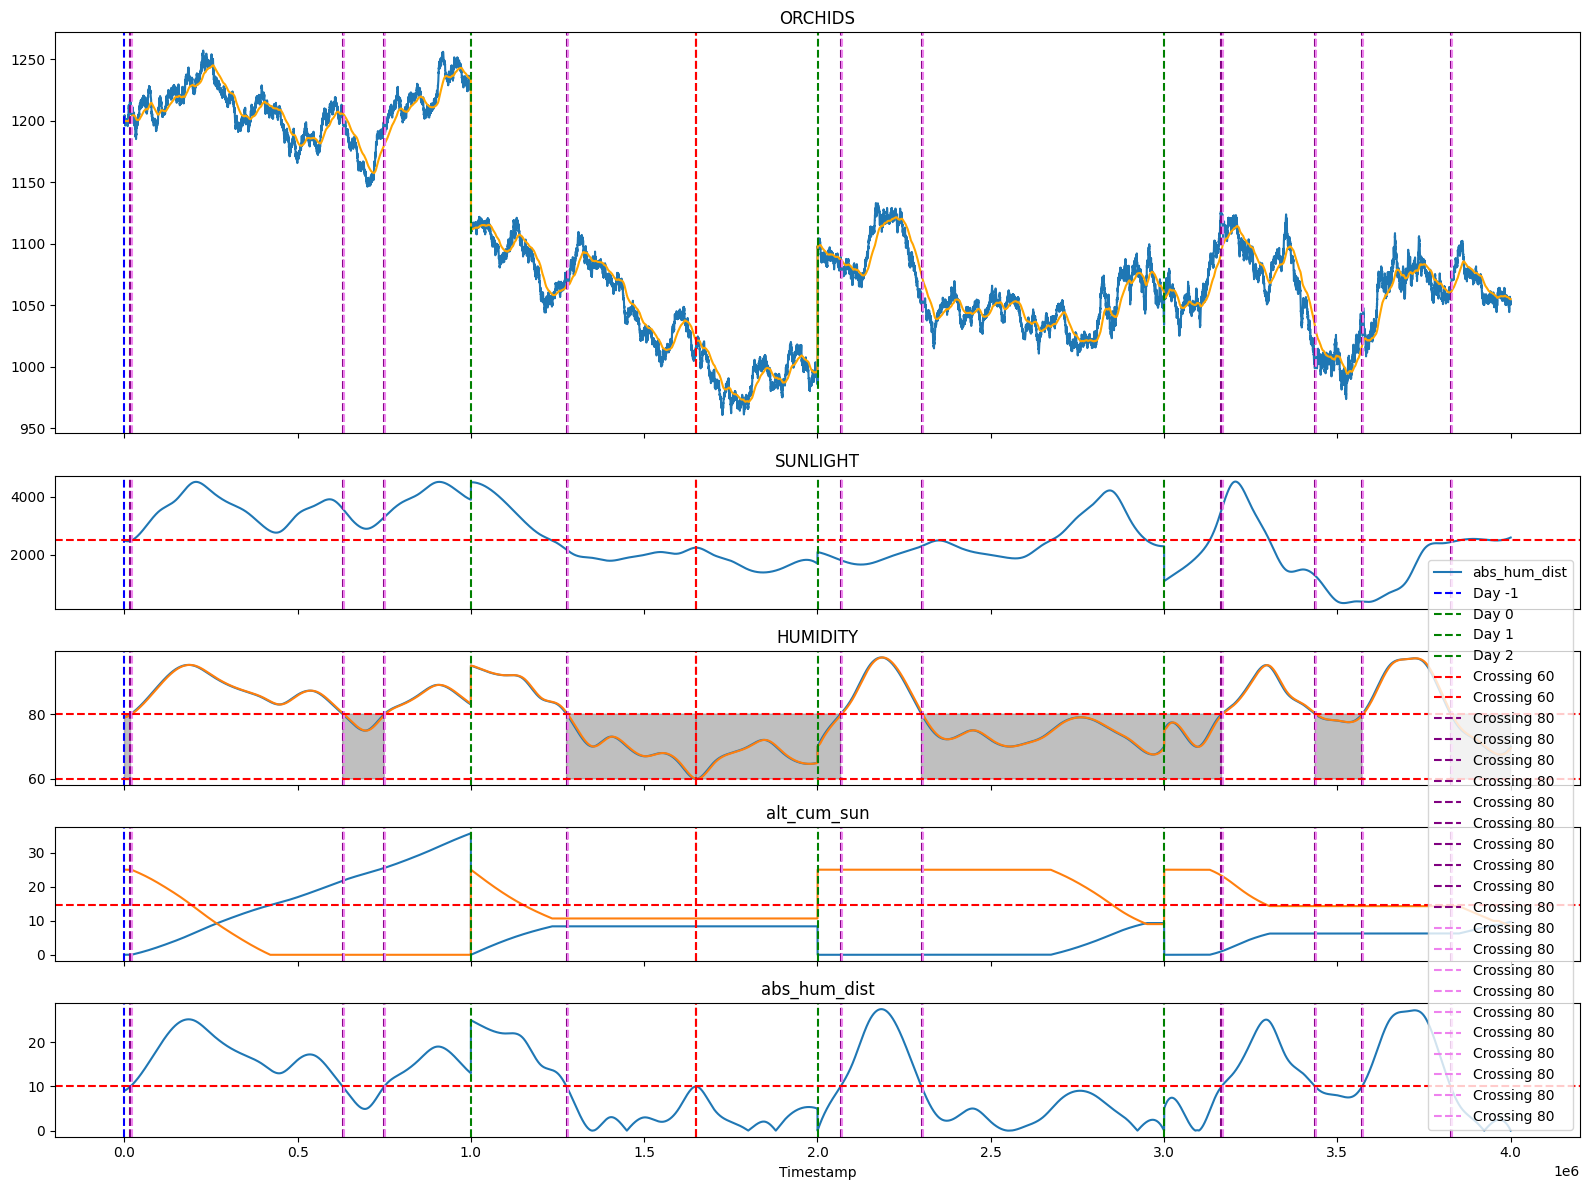

In [929]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'], label='ORCHIDS')
    axs[0].plot(df['new_timestamp'], df['orchid_roll'], label='roll', color = 'orange')
    #axs[0].plot(df['new_timestamp'], df['orchid_hull'], label='hull', color = 'red')
    #axs[0].plot(df['new_timestamp'], df['orchid_hull_ewm'], label='hull_ewm', color = 'gold')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'], label='SUNLIGHT')
    #axs[1].plot(df['new_timestamp'], df['sun_roll'], label='sun_roll')
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'], label='HUMIDITY')
    axs[2].plot(df['new_timestamp'], df['roll_hum_avg'], label='roll_hum_avg')
    axs[2].set_title('HUMIDITY')
    
    # Plot cum_sun vs new_timestamp
    axs[3].plot(df['new_timestamp'], df['alt_cum_sun'], label='alt_cum_sun')
    axs[3].plot(df['new_timestamp'], df['alt_remain_sun'], label='alt_remain_sun')
    axs[3].set_title('alt_cum_sun')

    # HUM dist
    axs[4].plot(df['new_timestamp'], df['abs_hum_dist'], label='abs_hum_dist')
    axs[4].set_title('abs_hum_dist')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='green', linestyle='--', label='Day 1')
        ax.axvline(3000300, color='green', linestyle='--', label='Day 2')

        # Detecting threshold crossings for HUMIDITY at 60 and 80
    for threshold in [60, 80]:
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity = df['HUMIDITY'].shift(1)
        # Crossing up the threshold
        crossing_up = (df['HUMIDITY'] > threshold) & (shifted_humidity <= threshold)
        # Crossing down the threshold
        crossing_down = (df['HUMIDITY'] < threshold) & (shifted_humidity >= threshold)
        # Combine crossing up and down
        crossings = crossing_up | crossing_down

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='red' if threshold == 60 else 'purple', linestyle='--', 
                           label=f'Crossing {threshold}')
                
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity1 = df['roll_hum_avg'].shift(1)
        # Crossing up the threshold
        crossing_up1 = (df['roll_hum_avg'] > threshold) & (shifted_humidity1 <= threshold)
        # Crossing down the threshold
        crossing_down1 = (df['roll_hum_avg'] < threshold) & (shifted_humidity1 >= threshold)
        # Combine crossing up and down
        crossings1 = crossing_up1 | crossing_down1

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings1, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='pink' if threshold == 60 else 'violet', linestyle='--', 
                           label=f'Crossing {threshold}')
    
    # Highlighting region between 60 and 80 for HUMIDITY
    axs[2].fill_between(df['new_timestamp'], 60, 80, where=(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80), color='gray', alpha=0.5, label='Target Humidity Zone')
    
    # Red lines for thresholds
    axs[1].axhline(2500, color='red', linestyle='--', label='Sunlight Threshold')
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    axs[3].axhline(25*7/12, color='red', linestyle='--', label='Cum Sun Threshold')
    axs[4].axhline(10, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

In [930]:
orchids_cleaned = orchids[(orchids['day'] <= 2) & (orchids['abs_hum_dist'] > 10)].dropna().copy() #  & (orchids['SUNLIGHT'] < 2500)  &  (orchids['abs_hum_dist'] <= 10)
X = orchids_cleaned[features_lin].copy()
Xrf = orchids_cleaned[features_rf].copy()
y = orchids_cleaned['orchid_roll_return_shift']
z = orchids_cleaned['orchid_roll_up_down']
orchids_cleaned

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_sun_low,alt_cum_sun,alt_remain_sun,alter_cum_sun,sun_diff,alt_sun_diff,alt_sun_diff_low,alter_sun,alter_sun_low,hum_dist,abs_hum_dist,alt_hum_dist,alter_hum_dist,alt_hum_h,alt_hum_m,high_low_humidity,mid_humidity,hum_diff,abs_hum_dist_diff,abs_hum_dist_diff_hl,abs_hum_dist_diff_mid,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_shift,orchid_return,orchid_roll,orchid_hull,orchid_hull_ewm,orchid_roll_shift,orchid_roll_return,orchid_roll_rel,orchid_roll_rel_shift,orchid_return_shift,orchid_up_down,orchid_roll_return_shift,orchid_roll_up_down,transport_roll,export_roll,import_roll,transport_diff,export_diff,import_diff
177,-1,17700,1215.50,1.3,9.5,-2.2,2486.7410,80.006966,17700,0.0,24.867410,0.002500,24.995714,0.004286,0.3824,0.0,0.3824,0.0,13.2590,10.006966,10.006966,0.006966,0.0,80.006966,0.0,1,1,0.007166,0.007166,0.0,0.007166,0,1.0,79.458149,9.458149,9.458149,79.772096,99.823,248.847326,248.847326,0.173226,1210.25,-5.25,1202.590187,1205.513451,1205.400690,1203.181749,0.591562,2.590187,1003.181749,-2.00,-1.0,0.422352,1.0,1.415965,9.912713,-2.088020,-0.000581,-2.068739e-03,-0.000561
178,-1,17800,1215.75,1.4,9.5,-2.2,2487.1277,80.014150,17800,0.0,24.871277,0.002500,24.995714,0.004286,0.3867,0.0,0.3867,0.0,12.8723,10.014150,10.014150,0.014150,0.0,80.014150,0.0,1,1,0.007184,0.007184,0.0,0.007184,0,1.0,79.461255,9.461255,9.461255,79.778728,99.822,249.064699,249.064699,0.351929,1210.00,-5.75,1202.655822,1205.664079,1205.541976,1203.215755,0.559933,2.655822,1003.215755,-2.00,-1.0,0.410270,1.0,1.415886,9.910655,-2.088579,-0.000080,-2.058421e-03,-0.000559
179,-1,17900,1214.75,1.4,9.5,-2.2,2487.5193,80.021350,17900,0.0,24.875193,0.002500,24.995714,0.004286,0.3916,0.0,0.3916,0.0,12.4807,10.021350,10.021350,0.021350,0.0,80.021350,0.0,1,1,0.007200,0.007200,0.0,0.007200,0,1.0,79.464367,9.464367,9.464367,79.785376,99.821,249.283015,249.283015,0.531085,1210.25,-4.50,1202.716142,1205.814445,1205.682977,1203.250838,0.534696,2.716142,1003.250838,-2.25,-1.0,0.397002,1.0,1.415807,9.908607,-2.089135,-0.000079,-2.048155e-03,-0.000556
180,-1,18000,1213.25,1.4,9.5,-2.2,2487.9153,80.028564,18000,0.0,24.879153,0.002500,24.995714,0.004286,0.3960,0.0,0.3960,0.0,12.0847,10.028564,10.028564,0.028564,0.0,80.028564,0.0,1,1,0.007214,0.007214,0.0,0.007214,0,1.0,79.467484,9.467484,9.467484,79.792041,99.820,249.502178,249.502178,0.710648,1211.25,-2.00,1202.768680,1205.962567,1205.821429,1203.290735,0.522054,2.768680,1003.290735,-3.00,-1.0,0.380059,1.0,1.415728,9.906569,-2.089688,-0.000079,-2.037939e-03,-0.000553
181,-1,18100,1211.75,1.4,9.5,-2.2,2488.3160,80.035790,18100,0.0,24.883160,0.002500,24.995714,0.004286,0.4007,0.0,0.4007,0.0,11.6840,10.035790,10.035790,0.035790,0.0,80.035790,0.0,1,1,0.007226,0.007226,0.0,0.007226,0,1.0,79.470606,9.470606,9.470606,79.798721,99.819,249.722168,249.722168,0.890568,1210.25,-1.50,1202.813475,1206.106686,1205.955312,1203.325444,0.511969,2.813475,1003.325444,-1.75,-1.0,0.369436,1.0,1.415649,9.904541,-2.090238,-0.000078,-2.027775e-03,-0.000550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38264,2,826100,1064.00,1.3,8.0,-4.0,2438.9448,80.093860,3826400,0.0,24.389448,6.236097,14.309547,10.690453,0.2427,0.0,0.2427,0.0,61.0552,10.093860,10.093860,0.093860,0.0,80.093860,0.0,1,1,-0.020474,-0.020474,0.0,-0.020474,1,-1.0,84.420957,14.420957,14.420957,80.816904,91.739,246.183674,246.183674,2.289194,1061.75,-2.25,1060.628387,1057.566040,1056.976291,1060.730422,0.102035,4.628387,1004.730422,6.50,1.0,0.331658,1.0,1.358392,8.000030,-4.035472,-0.000293,-1.497775e-07,0.000178
38265,2,826200,1063.00,1.3,8.0,-4.0,2439.1880,80.073400,3826500,0.0,24.391880,6.236097,14.309547,10

In [931]:
X_train_scaled = X[orchids_cleaned['day'] <= 1] # X_train # scaler.fit_transform(X_train) # 
X_train_scaled_rf = Xrf[orchids_cleaned['day'] <= 1]
X_test_scaled = X[orchids_cleaned['day'] > 1] # X_test # scaler.transform(X_test) # 
X_test_scaled_rf = Xrf[orchids_cleaned['day'] > 1]
y_train = y[orchids_cleaned['day'] <= 1]
y_test = y[orchids_cleaned['day'] > 1]
z_train = z[orchids_cleaned['day'] <= 1]
z_test = z[orchids_cleaned['day'] > 1]

In [932]:
%%time

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=39)

X_train_const = X_train_scaled # sm.add_constant(X_train_scaled) 

# Initialize the Linear Regression model
lin_reg_sm = sm.OLS(y_train, X_train_const).fit() # LinearRegression() # Lasso(alpha=0.1, max_iter=20000)

# Make predictions using the testing set
X_test_const = X_test_scaled # sm.add_constant(X_test_scaled) 
lin_pred = lin_reg_sm.predict(X_test_const)

# Initialize the Random Forest Regressor
forest_clf = RandomForestClassifier(n_estimators=500, max_depth=4, min_samples_leaf=600, random_state=39)

# Train the model
forest_clf.fit(X_train_scaled_rf, z_train)

# Make predictions using the testing set
forest_pred = forest_clf.predict(X_test_scaled_rf)

CPU times: total: 3.89 s
Wall time: 3.89 s


In [933]:
# For Linear Regression
lin_r2 = r2_score(y_test, lin_pred)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_mae = mean_absolute_error(y_test, lin_pred)

feature_names = X_train_const.columns
coefficients = lin_reg_sm.params

print(lin_reg_sm.summary())

print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

'''
for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef}')
print("Intercept:", lin_reg.intercept_)
'''
# Calculate metrics for Random Forest Classifier
accuracy = accuracy_score(z_test, forest_pred)
precision = precision_score(z_test, forest_pred, average='macro', zero_division=0)  # Adjust average as needed
recall = recall_score(z_test, forest_pred, average='macro')  # Adjust average as needed
f1 = f1_score(z_test, forest_pred, average='macro')  # Adjust average as needed

# Print results for Random Forest Classifier
print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest Precision: {precision}")
print(f"Random Forest Recall: {recall}")
print(f"Random Forest F1 Score: {f1}")

                               OLS Regression Results                               
Dep. Variable:     orchid_roll_return_shift   R-squared:                       0.170
Model:                                  OLS   Adj. R-squared:                  0.169
Method:                       Least Squares   F-statistic:                     215.9
Date:                      Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                              23:50:40   Log-Likelihood:                -12629.
No. Observations:                     13697   AIC:                         2.529e+04
Df Residuals:                         13683   BIC:                         2.539e+04
Df Model:                                13                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

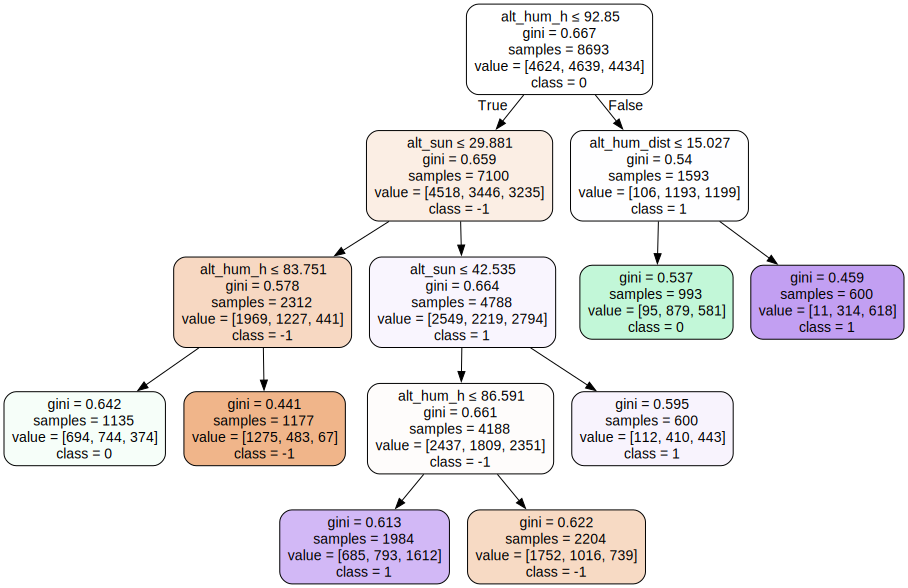

In [934]:
# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator = forest_clf.estimators_[0]

dot_data_rf = export_graphviz(estimator, out_file=None,
                              feature_names=X_train_scaled_rf.columns,
                              class_names=['-1', '0', '1'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_tree_r2_test")  # This saves the tree visualization to a file
graph_rf

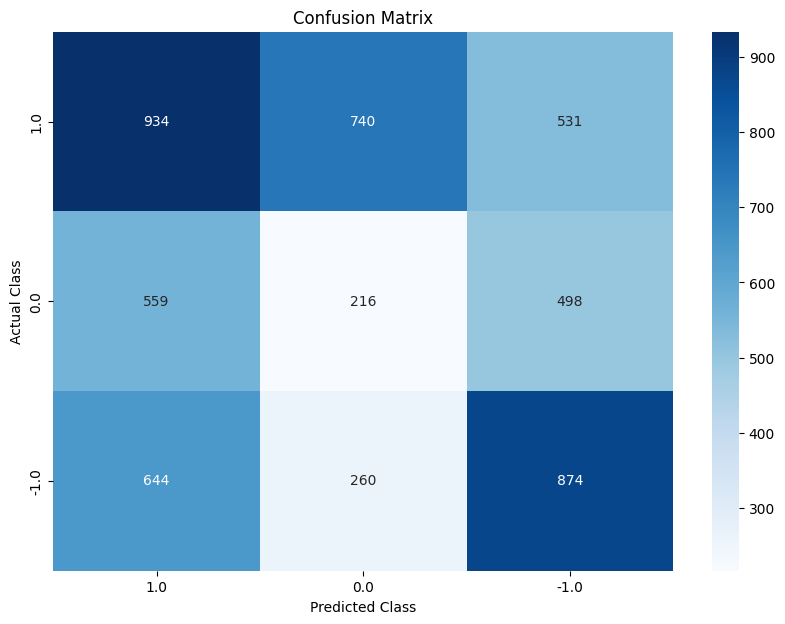

In [935]:
conf_matrix = confusion_matrix(z_test, forest_pred)
class_names = z_test.unique()  # Extract class names dynamically or define manually if necessary

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [936]:
# prices_0.head(50)

In [937]:
print(orchids_cleaned.describe())

                day      timestamp       ORCHIDS  TRANSPORT_FEES  \
count  18953.000000   18953.000000  18953.000000    18953.000000   
mean       0.224186  398525.626550   1142.437925        1.326349   
std        1.278999  272449.768362     68.780150        0.268408   
min       -1.000000     100.000000    998.750000        0.800000   
25%       -1.000000  180900.000000   1079.750000        1.200000   
50%        0.000000  310700.000000   1118.500000        1.300000   
75%        2.000000  615300.000000   1210.750000        1.500000   
max        2.000000  997200.000000   1257.250000        2.100000   

       EXPORT_TARIFF  IMPORT_TARIFF      SUNLIGHT      HUMIDITY  \
count   18953.000000   18953.000000  18953.000000  18953.000000   
mean        9.746716      -3.415892   2980.752951     88.288098   
std         1.584603       1.183962   1129.728714      4.934472   
min         8.000000      -6.000000    382.054750     59.999580   
25%         8.500000      -4.000000   2103.605200   

In [938]:
print(orchids_cleaned1.describe())

                day      timestamp       ORCHIDS  TRANSPORT_FEES  \
count  18967.000000   18967.000000  18967.000000    18967.000000   
mean       0.223283  398968.076132   1142.500619        1.326441   
std        1.278960  272835.328841     68.793451        0.268334   
min       -1.000000     100.000000    998.750000        0.800000   
25%       -1.000000  181000.000000   1079.875000        1.200000   
50%        0.000000  311000.000000   1118.500000        1.300000   
75%        2.000000  615850.000000   1210.750000        1.500000   
max        2.000000  998600.000000   1257.250000        2.100000   

       EXPORT_TARIFF  IMPORT_TARIFF      SUNLIGHT      HUMIDITY  \
count   18967.000000   18967.000000  18967.000000  18967.000000   
mean        9.745795      -3.415585   2981.439151     88.284294   
std         1.584380       1.183578   1129.593888      4.934636   
min         8.000000      -6.000000    382.054750     59.999580   
25%         8.500000      -4.000000   2104.446300   

In [939]:
feature_names

Index(['alter_sun', 'alter_sun_low', 'alt_sun_diff', 'transport_diff',
       'export_diff', 'import_diff', 'alt_hum_m', 'alt_hum_h',
       'abs_hum_dist_diff_hl', 'abs_hum_dist_diff_mid', 'alt_sun_diff_low',
       'alt_hum_dist', 'alter_hum_dist', 'alt_sun', 'alt_sun_low'],
      dtype='object')

In [940]:
coefficients

alter_sun               -2.986220e-01
alter_sun_low            2.994924e-01
alt_sun_diff             6.916025e-02
transport_diff           2.209742e+01
export_diff              8.835873e+00
import_diff              6.291364e+01
alt_hum_m               -1.246169e+01
alt_hum_h               -9.346558e+00
abs_hum_dist_diff_hl     2.129577e+01
abs_hum_dist_diff_mid    9.395560e+00
alt_sun_diff_low        -3.180618e-01
alt_hum_dist             9.362480e+00
alter_hum_dist          -2.220786e-15
alt_sun                  2.989130e+01
alt_sun_low              2.989060e+01
dtype: float64

In [941]:
%%time
def apply_model(row):
    # Calculate the sum product of features and coefficients excluding 'const'
    sum_product = (row[feature_names[feature_names != 'const']] * 
                   coefficients[feature_names != 'const']).sum()

    # Add the constant term if 'const' is in feature_names1
    if 'const' in feature_names:
        sum_product += coefficients['const']

    return sum_product

orchids['preds'] = orchids.apply(apply_model, axis=1)
orchids['preds'] = np.maximum(orchids['preds'], -2)
orchids['preds'] = np.minimum(orchids['preds'], 2)
orchids[orchids['abs_hum_dist'] < 10]

CPU times: total: 8.8 s
Wall time: 8.79 s


,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_sun_low,alt_cum_sun,alt_remain_sun,alter_cum_sun,sun_diff,alt_sun_diff,alt_sun_diff_low,alter_sun,alter_sun_low,hum_dist,abs_hum_dist,alt_hum_dist,alter_hum_dist,alt_hum_h,alt_hum_m,high_low_humidity,mid_humidity,hum_diff,abs_hum_dist_diff,abs_hum_dist_diff_hl,abs_hum_dist_diff_mid,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_shift,orchid_return,orchid_roll,orchid_hull,orchid_hull_ewm,orchid_roll_shift,orchid_roll_return,orchid_roll_rel,orchid_roll_rel_shift,orchid_return_shift,orchid_up_down,orchid_roll_return_shift,orchid_roll_up_down,transport_roll,export_roll,import_roll,transport_diff,export_diff,import_diff,preds
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,0,25.000000,0.000000,0.002500,24.995714,0.004286,NaN,NaN,0.0000,0.0000,0.0000,9.000000,9.000000,0.0,1.000000,0.0,79.000000,0,1,NaN,NaN,0.0,NaN,0,NaN,79.000000,9.000000,9.000000,79.000000,100.000,225.000000,225.000000,0.0,1199.75,-0.25,1200.000000,1200.000000,1200.000000,1200.135002,0.135002,0.000000,1000.135002,-2.5,-1.0,-0.161380,0.0,1.500000,10.500000,-2.000000,NaN,NaN,NaN,-2.0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,100,0.000000,24.994197,0.002500,24.995714,0.004286,-0.5803,0.0000,-0.5803,0.0000,0.5803,9.004100,9.004100,0.0,0.995900,0.0,79.004100,0,1,0.004100,0.004100,0.0,0.004100,0,0.0,79.002050,9.002050,9.002050,79.002050,99.999,225.050249,225.050249,0.0,1199.75,-2.00,1200.008728,1200.450406,1200.002485,1200.133082,0.124354,0.008728,1000.133082,-3.5,-1.0,-0.178031,0.0,1.500000,10.495012,-2.000000,0.000000,-4.987531e-03,0.000000e+00,-2.0
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,200,0.000000,24.988457,0.002500,24.995714,0.004286,-0.5740,0.0000,-0.5740,0.0000,1.1543,9.008210,9.008210,0.0,0.991790,0.0,79.008210,0,1,0.004110,0.004110,0.0,0.004110,0,0.0,79.004103,9.004103,9.004103,79.004103,99.998,225.101268,225.101268,0.0,1199.75,-2.00,1200.017413,1200.703664,1200.007191,1200.131172,0.113759,0.017413,1000.131172,-3.0,-1.0,-0.192106,0.0,1.500000,10.490050,-2.000000,0.000000,-4.962656e-03,0.000000e+00,-2.0
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,300,0.000000,24.982780,0.002500,24.995714,0.004286,-0.5677,0.0000,-0.5677,0.0000,1.7220,9.012340,9.012340,0.0,0.987660,0.0,79.012340,0,1,0.004130,0.004130,0.0,0.004130,0,0.0,79.006163,9.006163,9.006163,79.006163,99.997,225.153308,225.153308,0.0,1198.25,-3.50,1200.026054,1200.870389,1200.013876,1200.121789,0.095735,0.026054,1000.121789,-0.5,-1.0,-0.193641,0.0,1.500000,10.485112,-2.000000,0.000000,-4.937904e-03,0.000000e+00,-2.0
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,400,0.000000,24.977166,0.002500,24.995714,0.004286,-0.5614,0.0000,-0.5614,0.0000,2.2834,9.016490,9.016490,0.0,0.983510,0.0,79.016490,0,1,0.004150,0.004150,0.0,0.004150,0,0.0,79.008228,9.008228,9.008228,79.008228,99.996,225.206367,225.206367,0.0,1199.25,-2.50,1200.034652,1200.990536,1200.022325,1200.117441,0.082789,0.034652,1000.117441,-0.5,-1.0,-0.195169,0.0,1.500000,10.480199,-2.000000,0.000000,-4.913276e-03,0.000000e+00,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39998,2,999500,1052.00,0.8,8.0,-4.0,2597.2483,69.917725,3999800,25.972483,0.000000,9.656645,8.445751,16.554249,0.5449,0.5449,0.0000,97.2483,0.0000,-0.082275,0.082275,0.0,9.917725,0.0,69.917725,0,1,0.016265,-0.016265,0.0,-0.016265,0,-0.0,82.195822,12.195822,12.195822,69.404985,90.005,-2.136886,2.136886,0.0,NaN,NaN,1055.134756,1051.342590,1052.612330,NaN,NaN,-0.865244,NaN,NaN,NaN,NaN,NaN,0.803350,8.000000,-4.000006,-0.000017,-2.571099e-11,3.052108e-08,-2.0
39999,2,999600,1051.00,0.8,8.0,-4.0,2597.7950,69.934050,3999900,25.977950,0.000000,9.659243,8.441298,16.558702,0.5467,0.5467,0

In [942]:
heapq.nlargest(10, orchids['preds'])

[2.0,
 1.2669425991607994,
 1.2647262065801215,
 1.2642826518501948,
 1.262683531862507,
 1.2622874130473747,
 1.2604878641947295,
 1.260026657526069,
 1.2583838829045533,
 1.2580396733912522]

In [943]:
heapq.nsmallest(10, orchids['preds'])

[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]

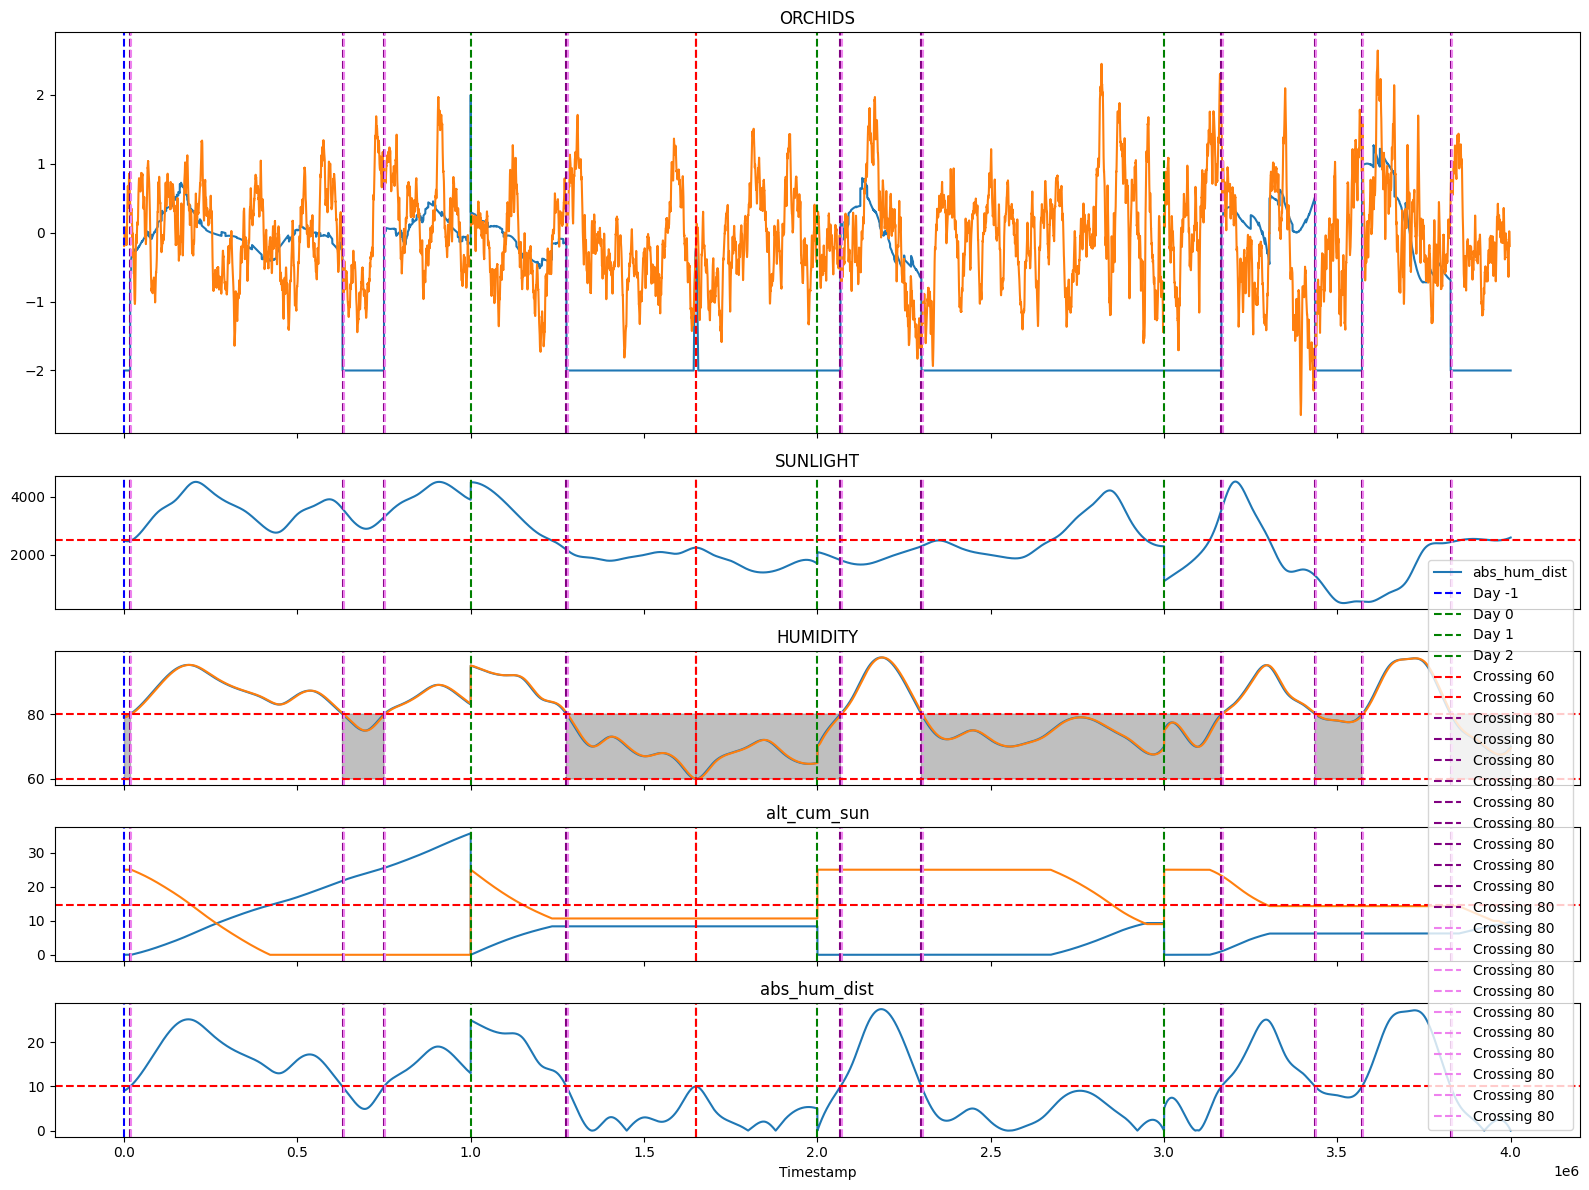

In [944]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    # axs[0].plot(df['new_timestamp'], df['orchid_return_shift'], label='ORCHIDS')
    axs[0].plot(df['new_timestamp'], df['preds'], label='preds')
    axs[0].plot(df['new_timestamp'], df['orchid_roll_return_shift'], label='roll_return_shift')
    # axs[0].plot(df['new_timestamp'], df['orchid_shift'], label='SHIFT')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'], label='SUNLIGHT')
    #axs[1].plot(df['new_timestamp'], df['sun_roll'], label='sun_roll')
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'], label='HUMIDITY')
    axs[2].plot(df['new_timestamp'], df['roll_hum_avg'], label='roll_hum_avg')
    axs[2].set_title('HUMIDITY')
    
    # Plot cum_sun vs new_timestamp
    axs[3].plot(df['new_timestamp'], df['alt_cum_sun'], label='alt_cum_sun')
    axs[3].plot(df['new_timestamp'], df['alt_remain_sun'], label='alt_remain_sun')
    axs[3].set_title('alt_cum_sun')

    # HUM dist
    axs[4].plot(df['new_timestamp'], df['abs_hum_dist'], label='abs_hum_dist')
    axs[4].set_title('abs_hum_dist')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='green', linestyle='--', label='Day 1')
        ax.axvline(3000300, color='green', linestyle='--', label='Day 2')

        # Detecting threshold crossings for HUMIDITY at 60 and 80
    for threshold in [60, 80]:
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity = df['HUMIDITY'].shift(1)
        # Crossing up the threshold
        crossing_up = (df['HUMIDITY'] > threshold) & (shifted_humidity <= threshold)
        # Crossing down the threshold
        crossing_down = (df['HUMIDITY'] < threshold) & (shifted_humidity >= threshold)
        # Combine crossing up and down
        crossings = crossing_up | crossing_down

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='red' if threshold == 60 else 'purple', linestyle='--', 
                           label=f'Crossing {threshold}')
                
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity1 = df['roll_hum_avg'].shift(1)
        # Crossing up the threshold
        crossing_up1 = (df['roll_hum_avg'] > threshold) & (shifted_humidity1 <= threshold)
        # Crossing down the threshold
        crossing_down1 = (df['roll_hum_avg'] < threshold) & (shifted_humidity1 >= threshold)
        # Combine crossing up and down
        crossings1 = crossing_up1 | crossing_down1

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings1, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='pink' if threshold == 60 else 'violet', linestyle='--', 
                           label=f'Crossing {threshold}')
    
    # Highlighting region between 60 and 80 for HUMIDITY
    axs[2].fill_between(df['new_timestamp'], 60, 80, where=(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80), color='gray', alpha=0.5, label='Target Humidity Zone')
    
    # Red lines for thresholds
    axs[1].axhline(2500, color='red', linestyle='--', label='Sunlight Threshold')
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    axs[3].axhline(25*7/12, color='red', linestyle='--', label='Cum Sun Threshold')
    axs[4].axhline(10, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

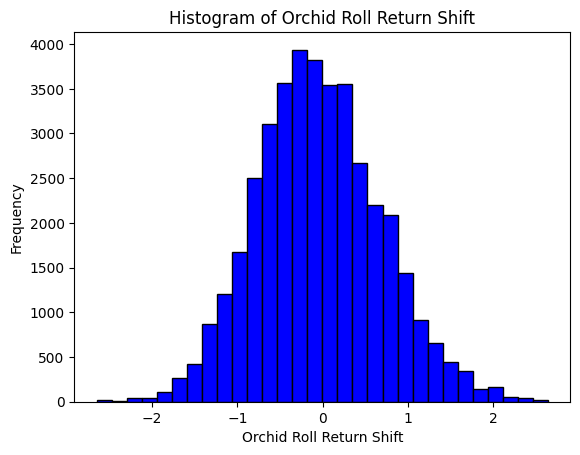

In [945]:
plt.hist(orchids['orchid_roll_return_shift'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Orchid Roll Return Shift')
plt.xlabel('Orchid Roll Return Shift')
plt.ylabel('Frequency')
plt.show()

# Appendix

In [946]:
# Run above this line
















orchids_cleaned1 = orchids[(orchids['abs_hum_dist'] > 10)].dropna().copy() #  & (orchids['day'] <= 1)
X2 = orchids_cleaned1[features_hl_hum].copy()
y2 = orchids_cleaned1['orchid_roll_rel_shift']
z2 = orchids_cleaned1['orchid_roll_up_down']
orchids_cleaned1

X_train_scaled1 = X2[orchids_cleaned1['day'] <= 1] # X_train # scaler.fit_transform(X_train) # 
X_test_scaled1 = X2[orchids_cleaned1['day'] > 1]# X_test # scaler.transform(X_test) # 
y_train1 = y2[orchids_cleaned1['day'] <= 1]
y_test1 = y2[orchids_cleaned1['day'] > 1]
z_train1 = z2[orchids_cleaned1['day'] <= 1]
z_test1 = z2[orchids_cleaned1['day'] > 1]

%%time

# Split the data into training and testing sets
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size=0.2, random_state=39)

# X_train_scaled1 = X_train1 # scaler.fit_transform(X_train) # 
# X_test_scaled1 = X_test1 # scaler.transform(X_test) # 

X_train_const1 = sm.add_constant(X_train_scaled1) 

# Initialize the Linear Regression model
lin_reg_sm1 = sm.OLS(y_train1, X_train_const1).fit() # LinearRegression() # Lasso(alpha=0.1, max_iter=20000)

# Make predictions using the testing set
X_test_const1 = sm.add_constant(X_test_scaled1)
lin_pred1 = lin_reg_sm1.predict(X_test_const1)

# Initialize the Random Forest Regressor
forest_clf1 = RandomForestClassifier(n_estimators=250, max_depth=4, min_samples_leaf=1000, random_state=42)

# Train the model
forest_clf1.fit(X_train_scaled1, z_train1)

# Make predictions using the testing set
forest_pred1 = forest_clf1.predict(X_test_scaled1)

# For Linear Regression
lin_r2 = r2_score(y_test1, lin_pred1)
lin_mse = mean_squared_error(y_test1, lin_pred1)
lin_mae = mean_absolute_error(y_test1, lin_pred1)

feature_names1 = X_train_const1.columns
coefficients1 = lin_reg_sm1.params

print(lin_reg_sm1.summary())


print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

'''
for feature, coef in zip(feature_names1, coefficients1):
    print(f'{feature}: {coef}')
print("Intercept:", lin_reg1.intercept_)
'''

# Calculate metrics for Random Forest Classifier
accuracy = accuracy_score(z_test1, forest_pred1)
precision = precision_score(z_test1, forest_pred1, average='macro', zero_division=0)  # Adjust average as needed
recall = recall_score(z_test1, forest_pred1, average='macro')  # Adjust average as needed
f1 = f1_score(z_test1, forest_pred1, average='macro')  # Adjust average as needed

# Print results for Random Forest Classifier
print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest Precision: {precision}")
print(f"Random Forest Recall: {recall}")
print(f"Random Forest F1 Score: {f1}")

# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator1 = forest_clf1.estimators_[0]

dot_data_rf1 = export_graphviz(estimator1, out_file=None,
                              feature_names=X_train_scaled1.columns,
                              class_names=['-1','0','1'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf1 = graphviz.Source(dot_data_rf1)
graph_rf1.render("random_forest_tree_r2test1")  # This saves the tree visualization to a file
graph_rf1

max_lags = 20
test_result = grangercausalitytests(orchids.loc[orchids['day']<=1][['ORCHIDS', 'HUMIDITY']], maxlag=max_lags)

max_lags = 20
test_result = grangercausalitytests(orchids.loc[orchids['day']<=1][['ORCHIDS', 'SUNLIGHT']], maxlag=max_lags)

max_lags = 20
test_result = grangercausalitytests(orchids.loc[orchids['day']<=1][['ORCHIDS', 'HUMIDITY']], maxlag=max_lags)


# target_humidity_df = orchids[(orchids['HUMIDITY'] >= 60) & (orchids['HUMIDITY'] <= 80) & (orchids['day'] == -1) & (orchids['timestamp'] > 745000)].reset_index()
# target_humidity_df.head(50)